In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%load_ext autoreload
%autoreload 2
from ieee80211phy.util import *
from ieee80211phy.receiver import *
from ieee80211phy.preamble import *
from ieee80211phy.ofdm import *
from ieee80211phy.transmitter import *
from ieee80211phy.modulation import *
from ieee80211phy.conv_coding import *
from ieee80211phy.signal_field import *

import warnings
warnings.filterwarnings("ignore")

INFO:ieee80211phy.transmitter:Package 100 bytes, 23 OFDM symbols (6 padding bits added)
	 data_rate=9, modulation=BPSK, coding_rate=3/4


00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101


<IPython.core.display.Javascript object>


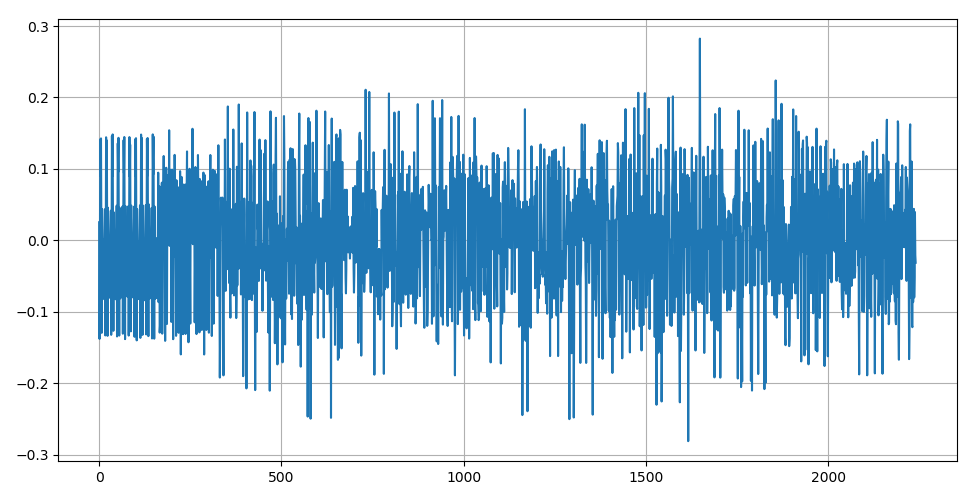

DEBUG:matplotlib.axes._base:update_title_pos


In [23]:
input = '0x0402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B6'
input = flip_byte_endian(hex_to_bitstr(input))
print(input)
iq = transmitter(input, data_rate=9)
iq = awgn(iq, 30)
plt.figure(figsize=(9.75,5))
plt.plot(iq)
plt.tight_layout()
plt.grid()

INFO:ieee80211phy.receiver:Found packets at: [192]


<IPython.core.display.Javascript object>


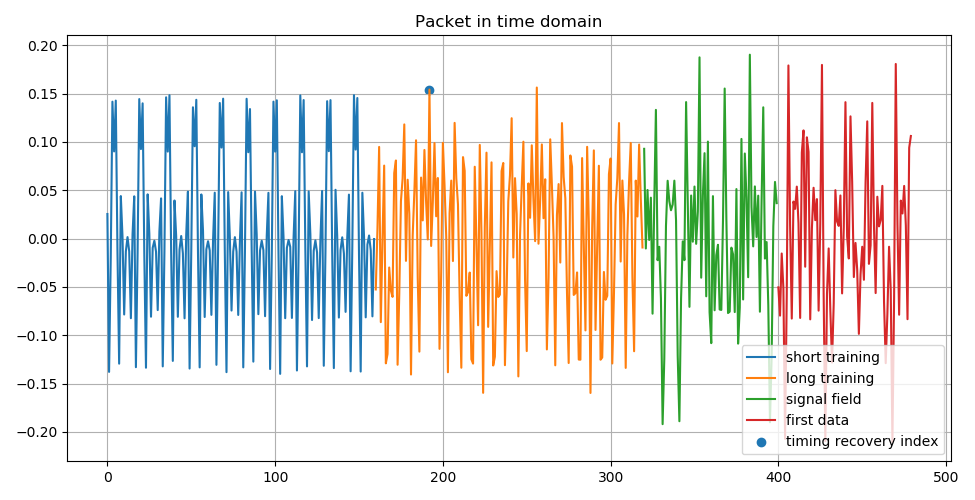

DEBUG:matplotlib.axes._base:update_title_pos


In [24]:
i = packet_detector(iq)[0]
plot_packet_time_domain(iq, i)

In [25]:
bits = receiver(iq[i-2:])
bits
# plot_channel_estimate(Trace['equalizer'])
# plot_signal_field_constellation(Trace['signal_symbols'])
# np.array(Trace['data_symbols']).real
# plot_rx(Trace['data_symbols'])

INFO:ieee80211phy.conv_coding:Decoded 24 bits, score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 4196 bytes, 934 OFDM symbols
	 data_rate=9, modulation=BPSK, coding_rate=3/4


ValueError: cannot reshape array of size 1843 into shape (80)

In [ ]:
00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101
00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101